In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#Load our dataframe account for the index columns
df = pd.read_csv('case_study.csv', index_col=0)


/Users/sashaepelbaum/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (171) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Quickly check to see the size of our DF, both rows and columns
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0


In [4]:
df.shape

(34545, 358)

## Subset your dataframe to only include the states in the tri-state area (NJ, CT, NY)

In [5]:
# your code here 9,34,36
df['_STATE']
tristates = [9,34,36]

df = df[df['_STATE'].isin(tristates)]
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0


Now check to see how large our subset df.

In [6]:
# your code here
df.shape

(34545, 358)

**PHYSHLTH** is the column we are interested in for this analysis, so let's start to investigate the column. Since we have a data cookbook, a.k.a. data dictionary) we want to start there before looking at the code. 

In [7]:
df['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

## 1. Handle the non-normal values

As you can see from the data dictionary, there are a number of responses that are coded with values that could throw off our descriptive statistics.  Let's clean up by mapping the responses to a more appropriate value, and handling any missing values.  

In [8]:
#reasign where = 88 to 0
zero_dicts = {88:0,
            77: np.nan,
            99: np.nan}

df['PHYSHLTH'] = df['PHYSHLTH'].replace(zero_dicts)

df['PHYSHLTH'].describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

## 2. Generate the descriptive statistics

Now that our target variable is cleaned up lets calculate the descriptive statistics, generate a graph that quickly shows those statistics, and generate a gprah shows the histogram of the data.

In [9]:
# descriptive statistics
df.describe()
df['PHYSHLTH'].describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

In [10]:
health = df['PHYSHLTH']
health.head()

49938    0.0
49939    0.0
49940    2.0
49941    0.0
49942    0.0
Name: PHYSHLTH, dtype: float64

In [11]:
health.head(10)

49938     0.0
49939     0.0
49940     2.0
49941     0.0
49942     0.0
49943     0.0
49944     0.0
49945     0.0
49946    28.0
49947     0.0
Name: PHYSHLTH, dtype: float64

In [12]:
# graphic showing those descriptive stats
health = health.reset_index()
health.drop(labels = 'index' ,axis = 1)


,PHYSHLTH
0,0.0
1,0.0
2,2.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,28.0
9,0.0


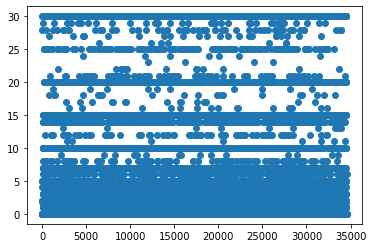

In [13]:
# # # graphic data.describe
# # # Define a new figure with matplotlib's .plot() function. 
# new_figure = plt.figure()

# # # Add a subplot to the figure - a new axes
# ax = new_figure.add_subplot()

x = health.index
y = health['PHYSHLTH']

plt.scatter(x,y)


/Users/sashaepelbaum/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/sashaepelbaum/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([2.1296e+04, 1.5380e+03, 1.9930e+03, 1.1870e+03, 6.2200e+02,
        1.0920e+03, 1.8700e+02, 6.4100e+02, 9.9000e+01, 1.5000e+01,
        7.5100e+02, 8.0000e+00, 6.9000e+01, 1.0000e+01, 3.2600e+02,
        6.4000e+02, 1.6000e+01, 1.5000e+01, 1.9000e+01, 1.0000e+01,
        4.0200e+02, 7.0000e+01, 1.2000e+01, 4.0000e+00, 7.0000e+00,
        1.5900e+02, 7.0000e+00, 2.2000e+01, 5.7000e+01, 2.4730e+03]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30.]),
 <a list of 30 Patch objects>)

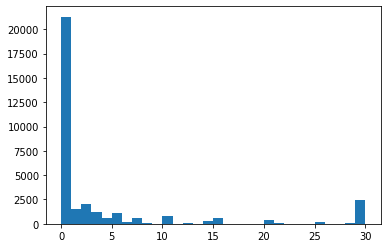

In [14]:
# graphic showing the distribution of data
plt.hist(y, bins=30)

## 3. Generate a graphic that compares the average number of sick days for each state. 

In [15]:
# code to calculate the average number of sick days by state
state_mean = pd.DataFrame(df.groupby(['_STATE']).agg({'PHYSHLTH':'mean'}))
state_mean.head()
state_mean = state_mean.reset_index()


In [16]:
state_mean

,_STATE,PHYSHLTH
0,9.0,3.688562
1,34.0,4.380957
2,36.0,4.148030


In [17]:
state = pd.DataFrame(df.groupby(['_STATE',health.index]).agg({'PHYSHLTH':'mean'}))
state.head()

PHYSHLTH
_STATE            
9.0    0       0.0
       1       0.0
       2       2.0
       3       0.0
       4       0.0

In [18]:
state.count()

PHYSHLTH    33747
dtype: int64

In [19]:
# code to graph those averages using matplotlib
state_codes = {9.0: 'CT',34.0: 'NJ', 36.0: 'NY'}


state_mean['_STATE'] = state_mean['_STATE'].replace(state_codes)


In [20]:
state_mean

,_STATE,PHYSHLTH
0,CT,3.688562
1,NJ,4.380957
2,NY,4.148030


<BarContainer object of 3 artists>

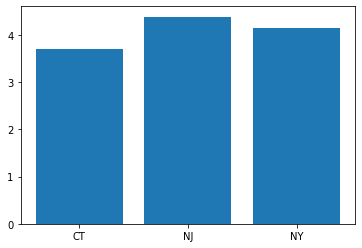

In [21]:
plt.bar(state_mean['_STATE'], state_mean['PHYSHLTH'])

## 4. Turn the number of sick days into a classification of of chronically sick people.  

Chronically sick people account for a significant proportion of the costs for health insurers. If we can identify what leads people to be chronically sick, we can address them with specific treatments.



In [22]:
# code to create new colum for chronically sick 20 days
state = pd.DataFrame(df.groupby(['_STATE',health.index]).agg({'PHYSHLTH':'mean'}))
state.head()


state['sick?']=np.where(state['PHYSHLTH']>=20, 1 , 0)
state.head()

PHYSHLTH  sick?
_STATE                   
9.0    0       0.0      0
       1       0.0      0
       2       2.0      0
       3       0.0      0
       4       0.0      0

In [23]:
state.count()

PHYSHLTH    33747
sick?       34545
dtype: int64

## 5. Create a graphic that compares the percentage of people labeled as 'sick' in each state. 

In [24]:
state_pcts = pd.DataFrame(state['sick?'].groupby(level=0).apply(lambda x: 100 * x.sum()/ x.count()))
state_pcts 

,sick?
_STATE,
9.0,8.301851
34.0,10.394602
36.0,9.119112


In [25]:
# code to calculate averages per state
state_pcts = state_pcts.reset_index()


In [26]:
state_codes = {9.0: 'CT',34.0: 'NJ', 36.0: 'NY'}


state_pcts['_STATE'] = state_pcts['_STATE'].replace(state_codes)

In [27]:
state_pcts.head()

,_STATE,sick?
0,CT,8.301851
1,NJ,10.394602
2,NY,9.119112


<BarContainer object of 3 artists>

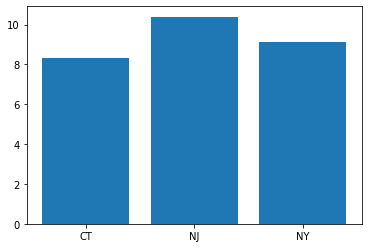

In [28]:
# create graphic to compare chronically sick by state
plt.bar(state_pcts['_STATE'], state_pcts['sick?'])

## 6. Independent Variables (categorical)

Let's take the column `SMOKDAY2` and start to prepare it so that we can see how it is possibly correlated to `PHYSHLTH`.

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Generate a graphic that compares the physical health of the different groups of 'smokers'.

In [29]:
smoke = df[['_STATE','SMOKDAY2','SMOKE100','PHYSHLTH']]

In [30]:
smoke.head()

,_STATE,SMOKDAY2,SMOKE100,PHYSHLTH
49938,9.0,NaN,2.0,0.0
49939,9.0,NaN,2.0,0.0
49940,9.0,NaN,2.0,2.0
49941,9.0,NaN,2.0,0.0
49942,9.0,3.0,1.0,0.0


In [31]:
smoke.count()

_STATE      34545
SMOKDAY2    13783
SMOKE100    33107
PHYSHLTH    33747
dtype: int64

In [32]:
#7,9 --> nan
# 3 --> 0
# 2 --> 1
# 1 --> 2

smoke_code = {7: 'NaN', 9: 'NaN', 3:0, 2:1, 1:2}


In [33]:
smoke['SMOKDAY2'] = smoke['SMOKDAY2'].replace(smoke_code)

/Users/sashaepelbaum/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
smoke.count()


_STATE      34545
SMOKDAY2    13783
SMOKE100    33107
PHYSHLTH    33747
dtype: int64

In [35]:
smoke = smoke.reset_index()
smoke = smoke.rename(columns={'index':'id'})

In [36]:
smoke['SMOKDAY2'].value_counts()

0      9703
2      2676
1      1371
NaN      33
Name: SMOKDAY2, dtype: int64

In [37]:



# for i, value in enumerate(smoke['SMOKDAY2']):
#     if value == 'NaN':
#         if smoke['SMOKE100'][i] == 1:
#             value = 1
#         elif smoke['SMOKE100'][i] == 2:
#             value = 0
#         else:
#             pass
#     else:
#         pass


# def filter(data_frame, series_1, series_2):
#     for i, v in enumerate(series_1):
#         if v == 'NaN':
#             if data_frame.series_2[i] == 1:
#                 v = 1
#             if data_frame.series_2[i] == 2:
#                 v = 0
#         else:
#             pass

# smoke['SMOKDAY2'] = smoke['SMOKDAY2'].apply(filter(smoke, smoke['SMOKDAY2'],smoke['SMOKE100']))

In [38]:
# smokers= df[['_STATE','SMOKE100','SMOKDAY2','PHYSHLTH']]
smokers = smoke
smokers = smokers[smokers.SMOKE100 == 1]
smokers


,id,_STATE,SMOKDAY2,SMOKE100,PHYSHLTH
4,49942,9.0,0,1.0,0.0
6,49944,9.0,0,1.0,0.0
8,49946,9.0,0,1.0,28.0
13,49951,9.0,0,1.0,0.0
16,49954,9.0,0,1.0,0.0
18,49956,9.0,0,1.0,0.0
21,49959,9.0,2,1.0,0.0
22,49960,9.0,2,1.0,0.0
26,49964,9.0,0,1.0,5.0
27,49965,9.0,0,1.0,4.0


In [39]:
smokers['SMOKDAY2'] = smokers['SMOKDAY2'].replace({None:1})

/Users/sashaepelbaum/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [40]:
smokers

,id,_STATE,SMOKDAY2,SMOKE100,PHYSHLTH
4,49942,9.0,0,1.0,0.0
6,49944,9.0,0,1.0,0.0
8,49946,9.0,0,1.0,28.0
13,49951,9.0,0,1.0,0.0
16,49954,9.0,0,1.0,0.0
18,49956,9.0,0,1.0,0.0
21,49959,9.0,2,1.0,0.0
22,49960,9.0,2,1.0,0.0
26,49964,9.0,0,1.0,5.0
27,49965,9.0,0,1.0,4.0


In [41]:
non_smokers = smoke
non_smokers = non_smokers[non_smokers.SMOKE100 == 2]
non_smokers['SMOKDAY2'] = non_smokers['SMOKDAY2'].replace({None : 0})
non_smokers.count()

/Users/sashaepelbaum/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


id          19087
_STATE      19087
SMOKDAY2    19087
SMOKE100    19087
PHYSHLTH    18685
dtype: int64

In [42]:
final_smokers = pd.merge(smokers, non_smokers, how='outer')
final_smokers.head()

,id,_STATE,SMOKDAY2,SMOKE100,PHYSHLTH
0,49942,9.0,0,1.0,0.0
1,49944,9.0,0,1.0,0.0
2,49946,9.0,0,1.0,28.0
3,49951,9.0,0,1.0,0.0
4,49954,9.0,0,1.0,0.0


In [43]:
final_smokers.count()

id          32882
_STATE      32882
SMOKDAY2    32882
SMOKE100    32882
PHYSHLTH    32165
dtype: int64

In [44]:
final_smokers

,id,_STATE,SMOKDAY2,SMOKE100,PHYSHLTH
0,49942,9.0,0,1.0,0.0
1,49944,9.0,0,1.0,0.0
2,49946,9.0,0,1.0,28.0
3,49951,9.0,0,1.0,0.0
4,49954,9.0,0,1.0,0.0
5,49956,9.0,0,1.0,0.0
6,49959,9.0,2,1.0,0.0
7,49960,9.0,2,1.0,0.0
8,49964,9.0,0,1.0,5.0
9,49965,9.0,0,1.0,4.0


In [45]:
smoke = smoke.dropna()


In [46]:
smoke.count()

id          13468
_STATE      13468
SMOKDAY2    13468
SMOKE100    13468
PHYSHLTH    13468
dtype: int64

In [47]:
smoke.head()

,id,_STATE,SMOKDAY2,SMOKE100,PHYSHLTH
4,49942,9.0,0,1.0,0.0
6,49944,9.0,0,1.0,0.0
8,49946,9.0,0,1.0,28.0
13,49951,9.0,0,1.0,0.0
16,49954,9.0,0,1.0,0.0


In [48]:
final_final_smokers = pd.merge(final_smokers,smoke, on='id', how='left')
#final_final_smokers = pd.concat([smoke, final_smokers], axis=0, join='outer')

In [49]:
final_final_smokers.head()

,id,_STATE_x,SMOKDAY2_x,SMOKE100_x,PHYSHLTH_x,_STATE_y,SMOKDAY2_y,SMOKE100_y,PHYSHLTH_y
0,49942,9.0,0,1.0,0.0,9.0,0,1.0,0.0
1,49944,9.0,0,1.0,0.0,9.0,0,1.0,0.0
2,49946,9.0,0,1.0,28.0,9.0,0,1.0,28.0
3,49951,9.0,0,1.0,0.0,9.0,0,1.0,0.0
4,49954,9.0,0,1.0,0.0,9.0,0,1.0,0.0


In [50]:
final_final_smokers.count()

id            32882
_STATE_x      32882
SMOKDAY2_x    32882
SMOKE100_x    32882
PHYSHLTH_x    32165
_STATE_y      13468
SMOKDAY2_y    13468
SMOKE100_y    13468
PHYSHLTH_y    13468
dtype: int64

In [51]:
final_final_smokers = final_final_smokers.drop(columns=['_STATE_y','SMOKDAY2_y','SMOKE100_y','PHYSHLTH_y'])

In [52]:
final_final_smokers.head()

,id,_STATE_x,SMOKDAY2_x,SMOKE100_x,PHYSHLTH_x
0,49942,9.0,0,1.0,0.0
1,49944,9.0,0,1.0,0.0
2,49946,9.0,0,1.0,28.0
3,49951,9.0,0,1.0,0.0
4,49954,9.0,0,1.0,0.0


In [53]:
# Generate a histogram for the variable.
# Generate graphics that show how the responses to this variable might differ by state.
# Generate a graphic that compares the physical health of the different groups of 'smokers'.

In [54]:
state_smoke_grouping = pd.DataFrame(final_final_smokers.groupby(['_STATE_x','SMOKDAY2_x'])['PHYSHLTH_x'])


In [55]:
state_smoke_grouping.head()

,0,1
0,"(9.0, 0)",0 0.0 1 0.0 2 28.0 3 ...
1,"(9.0, 1)",11 2.0 23 0.0 38 1.0 41 ...
2,"(9.0, 2)",6 0.0 7 0.0 13 0.0 20 ...
3,"(9.0, NaN)",925 7.0 1308 20.0 2165 0.0 2320 ...
4,"(34.0, 0)",4294 0.0 4295 30.0 4297 10.0 4298...


([array([6835.,  733.,  216.,  176.,   92.,  150.,   89.,   22.,   35.,
          522.]),
  array([213.,  31.,   8.,  13.,   4.,  10.,   8.,   3.,   4.,  54.]),
  array([462.,  54.,  17.,  18.,  14.,  20.,  20.,   1.,   6.,  94.]),
  array([4., 0., 2., 0., 0., 1., 1., 0., 0., 0.]),
  array([7097.,  769.,  281.,  226.,  121.,  176.,  109.,   23.,   52.,
          741.]),
  array([323.,  44.,  12.,  15.,   2.,  11.,  11.,   2.,   4.,  61.]),
  array([560.,  76.,  27.,  16.,   9.,  37.,  19.,   5.,   7., 145.]),
  array([2., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([7158.,  923.,  277.,  225.,  119.,  191.,  123.,   20.,   48.,
          630.]),
  array([319.,  54.,  18.,  18.,  11.,  19.,  12.,   1.,   4.,  59.]),
  array([627., 102.,  31.,  28.,  20.,  30.,  20.,   2.,   8., 136.]),
  array([12.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  2.])],
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.]),
 <a list of 12 Lists of Patches objects>)

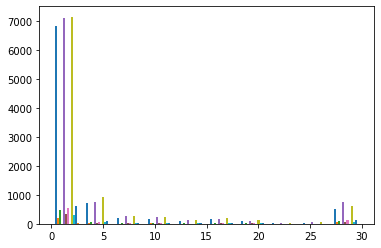

In [56]:
plt.hist(state_smoke_grouping[1])

In [57]:
# plt.hist(final_final_smokers['SMOKDAY2_x'])

## 7. Independent Variables (continuous):

Now let's look at a continuous variable (ALCDAY5) and see how that might impact a person's health. 

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Calculate the correlation coefficient between `PHYSHLTH` and `ALCDAY5`.
5. Generate a graphic that shows the possible relationship between `PHYSHLTH` and `ALCDAY5`.

In [59]:
alcohol = df[['_STATE','ALCDAY5','PHYSHLTH']]

In [60]:
alcohol.head()

,_STATE,ALCDAY5,PHYSHLTH
49938,9.0,101.0,0.0
49939,9.0,230.0,0.0
49940,9.0,888.0,2.0
49941,9.0,103.0,0.0
49942,9.0,101.0,0.0


In [62]:
def frequency(x):
    if x < 200:
        x = (x-100)/7
        return x
    elif x < 300:
        x = (x-200)/30
        return x
    elif x == 888:
        x=0
        return x

In [63]:
alcohol['ALCDAY5'] = alcohol['ALCDAY5'].apply(frequency)

/Users/sashaepelbaum/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [64]:
alcohol['ALCDAY5'].head()

49938    0.142857
49939    1.000000
49940    0.000000
49941    0.428571
49942    0.142857
Name: ALCDAY5, dtype: float64

In [65]:
alcohol.head(10)

,_STATE,ALCDAY5,PHYSHLTH
49938,9.0,0.142857,0.0
49939,9.0,1.000000,0.0
49940,9.0,0.000000,2.0
49941,9.0,0.428571,0.0
49942,9.0,0.142857,0.0
49943,9.0,0.571429,0.0
49944,9.0,1.000000,0.0
49945,9.0,0.133333,0.0
49946,9.0,0.000000,28.0
49947,9.0,0.166667,0.0


In [66]:
alcohol = alcohol.dropna()

In [67]:
alcohol = alcohol[alcohol.ALCDAY5 <= 1]

In [68]:
alcohol.head()

,_STATE,ALCDAY5,PHYSHLTH
49938,9.0,0.142857,0.0
49939,9.0,1.000000,0.0
49940,9.0,0.000000,2.0
49941,9.0,0.428571,0.0
49942,9.0,0.142857,0.0


In [ ]:
# Calculate the descriptive statistics of the variable.
# Generate a histogram for the variable.
# Generate graphics that show how the responses to this variable might differ by state.
# Calculate the correlation coefficient between PHYSHLTH and ALCDAY5.
# # Generate a graphic that shows the possible relationship between PHYSHLTH and ALCDAY5.

In [69]:
alcohol.describe()

,_STATE,ALCDAY5,PHYSHLTH
count,31532.000000,31532.000000,31532.000000
mean,26.969555,0.182532,4.106463
std,12.045939,0.280153,8.525790
min,9.000000,0.000000,0.000000
25%,9.000000,0.000000,0.000000
50%,34.000000,0.066667,0.000000
75%,36.000000,0.233333,3.000000
max,36.000000,1.000000,30.000000


## 8. Additional variables: Choose two additional survey items you would like to investigate do steps  6 or 7 for those variables.

In [ ]:
# your code here

## 9. Based on your initial data exploration, what are some hypotheses of what affects a person's health that you would like to further investigate?

Type out your initial hyptotheses below:

1. 

2. 

3.  

## Bonus: Create some cool graphics.  